# <span style="color:green">Nonhlanhla Mazibuko
</span>

# <span style="color:blue">Practical: Dimensionality Reduction
</span>

### PCA
#### In this lesson, we will look at how to do PCA
The dataset used in this lesson comes from the Landsat-8 Optical Land Imager (OLI). It is freely available publically. This is obviously an advantage of satellite-based remote sensing data. Other satellites are also in operation, like the Sentinel satelite, which has higher spatial resolution than the Landsat-8. Although there are advantages and disadvantages to each source.


In [7]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [1]:

import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

#### Let's load some remote sensing data
This data was acquired on the 30th of December, 2021. The particular image that we are using is a multispectral image over the Assen mine area, which contains a surficial footprint of the Assen iron ore deposit, which is a BIF-type of deposit.

The data has already been pre-processed - here we'll use the tabular format that has been processed.

We won't cover remote sensing data processing in this lecture - that's beyond the scope and strictly within remote sensing as a discipline.

In [2]:
input_data = pd.read_csv('Processed_Assen_RS_data.csv')

size = (172, 284)

In [3]:
input_data

Unnamed: 0  Longitude   Latitude  Band1  Band2  Band3  Band4  Band5  \
0               0  27.564250 -25.105965    188    227    363    406    750   
1               1  27.564548 -25.105963    126    144    215    166    917   
2               2  27.564845 -25.105962    141    187    421    310   2263   
3               3  27.565143 -25.105961    111    170    402    291   2558   
4               4  27.565440 -25.105960    232    365    658    779   2409   
...           ...        ...        ...    ...    ...    ...    ...    ...   
48843       48843  27.647507 -25.151951    381    449    677    884   1931   
48844       48844  27.647804 -25.151950    408    483    720    996   1840   
48845       48845  27.648102 -25.151949    364    414    584    796   1464   
48846       48846  27.648399 -25.151947    387    415    565    745   1389   
48847       48847  27.648697 -25.151946    416    435    578    719   1445   

       Band6  Band7  
0        709    440  
1        479    232  
2        947    438  
3       1154    562  
4       2199   1319  
...      ...    ...  
48843   2451   1749  
48844   2544   2068  
48845   2274   2039  
48846   2199   1867  
48847   2133   1718  

[48848 rows x 10 columns]

In [4]:
len(input_data)/284


172.0

#### Check for missing pixels in bands 

In [5]:
input_data.isnull().values.any()

False

#### Basic data pre-processing to further process the tabular data, as well as to extract metadata

In [8]:
# We'll need some lists of similar types of metadata to make referencing the data easier
coord_names = ['Longitude', 'Latitude'] 
bands = ['Band1', 'Band2','Band3']


input_data['Latitude'] = pd.to_numeric(input_data['Latitude'], errors='coerce') #convert latitude to numeric values
input_data['Longitude'] = pd.to_numeric(input_data['Longitude'], errors='coerce') #convert longitude to numeric values



for band in bands:
    input_data[band] = np.abs(pd.to_numeric(input_data[band], errors='coerce')) #make all chemical composition to be numeric

    
input_data.describe()

Unnamed: 0     Longitude      Latitude         Band1         Band2  \
count  48848.000000  48848.000000  48848.000000  48848.000000  48848.000000   
mean   24423.500000     27.606466    -25.128960    251.722547    316.526327   
std    14101.347312      0.024398      0.013452     94.493587    106.311331   
min        0.000000     27.564250    -25.152291      0.000000     62.000000   
25%    12211.750000     27.585356    -25.140607    186.000000    248.000000   
50%    24423.500000     27.606466    -25.128958    245.000000    312.000000   
75%    36635.250000     27.627580    -25.117309    312.000000    377.000000   
max    48847.000000     27.648697    -25.105620    968.000000   1171.000000   

              Band3         Band4         Band5         Band6         Band7  
count  48848.000000  48848.000000  48848.000000  48848.000000  48848.000000  
mean     509.547433    609.615419   1648.147539   1801.414490   1216.814609  
std      145.656643    238.682890    446.999961    469.584012    432.462650  
min      149.000000    121.000000    150.000000    141.000000    102.000000  
25%      436.000000    467.000000   1382.000000   1539.000000    937.750000  
50%      498.000000    577.000000   1585.000000   1830.000000   1196.000000  
75%      562.000000    706.000000   1865.000000   2070.000000   1454.000000  
max     1834.000000   2558.000000   5025.000000   4031.000000   3158.000000

#### Basic Exploratory Data Analysis
Note that this is always a part of a data-driven workflow, almost regardless of the type of data and task begin accomplished.

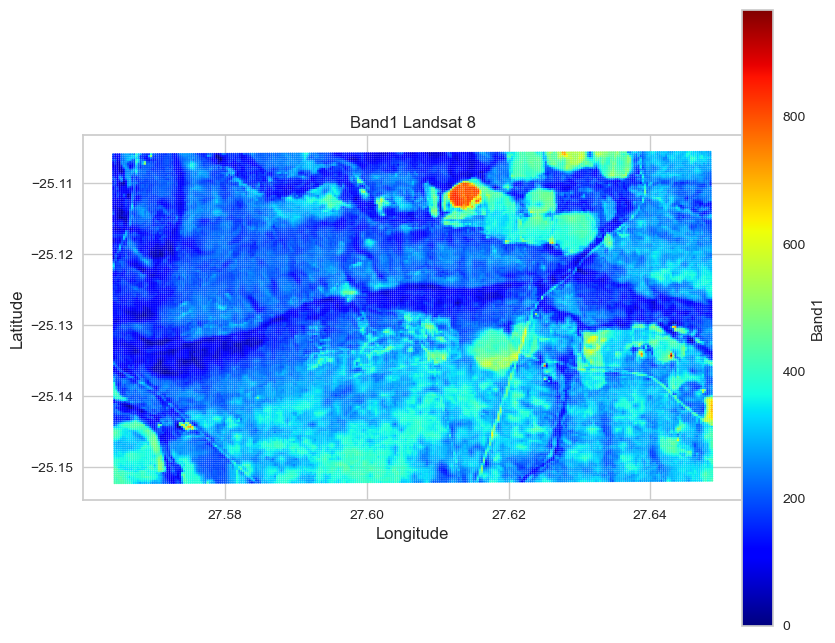

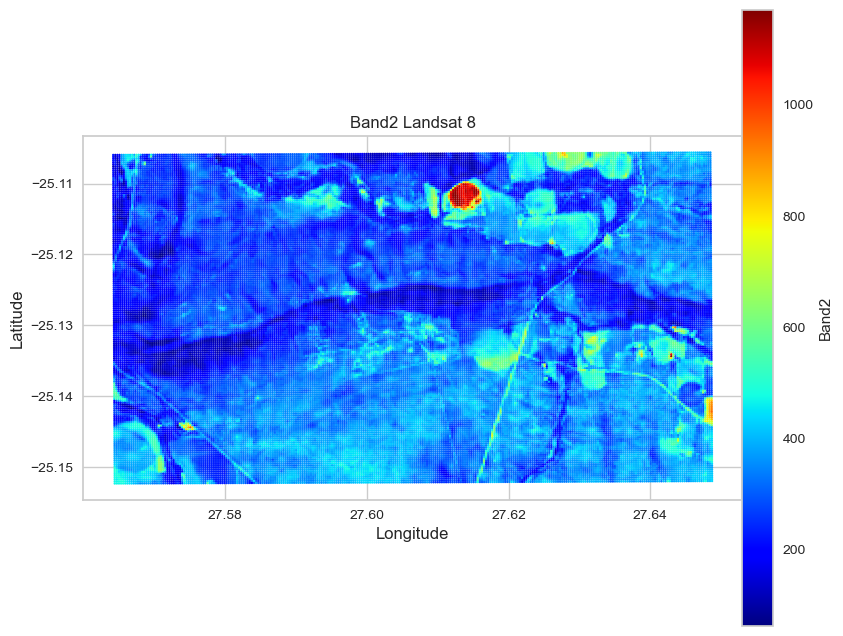

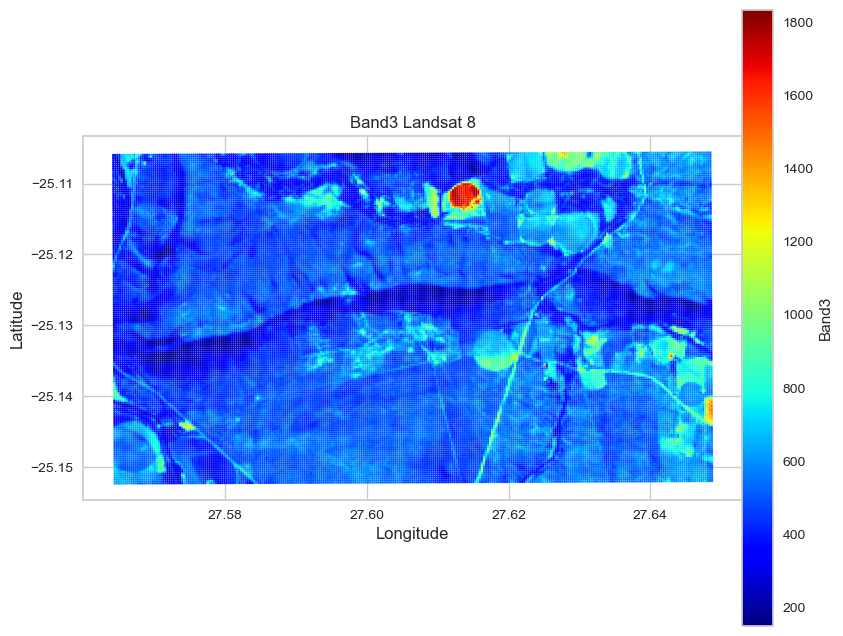

CPU times: total: 2.09 s
Wall time: 3.58 s


In [9]:
%%time
for Band in bands:

        fig = plt.figure(figsize = (10,8))
        ax = fig.add_subplot(111) 
        
        ax.set_aspect('equal')
        ax.set_xlabel('Longitude', fontsize = 12)
        ax.set_ylabel('Latitude', fontsize = 12)
        ax.set_title(Band+' Landsat 8', fontsize = 12)
        
        colormap=plt.cm.get_cmap('jet',int((max(input_data[Band])-min(input_data[Band]))*20))
        
        
        

        scatter=ax.scatter(input_data.Longitude, input_data.Latitude, c = input_data[Band], 
                           cmap = colormap, s=3,alpha=1.0, edgecolors='none', label='Landsat 8')
        
        #ax.text(27.597720,-25.125509,  'M', fontsize=10,color='purple', 
                #bbox=dict(facecolor='white', alpha = 0.5, edgecolor='white', boxstyle='round'))

       # ax.text(27.590647,-25.127248,  'W', fontsize=10,color='purple', 
                #bbox=dict(facecolor='white', alpha = 0.5, edgecolor='white', boxstyle='round'))

        #ax.text(27.607325,-25.124558,  'E', fontsize=10,color='purple', 
                #bbox=dict(facecolor='white', alpha = 0.5, edgecolor='white', boxstyle='round'))

        #ax.text(27.60,-25.13,  'Main Orebody', fontsize=10,color='purple', 
                #bbox=dict(facecolor='white', alpha = 0.5, edgecolor='white', boxstyle='round'))
        
         

        cbar=fig.colorbar(scatter, pad=-0.000)
        
        cbar.set_label(Band)
        ax.grid(True)
        plt.show()


#### Binary Scatter Diagrams
We see a lot of linear correlations between bands. This is typical of remote sensing data, because adjacent bands are essentially cut from a spectrum and responses under typical physical conditions are wide-spectrum for many materials. So we expect that differences in the bands are likely subtle relative to the overall band ratios. This hints at why it is important in this discipline to pre-process data to standardize band amplitudes prior to band composition - e.g., for band ratio analysis.

<Figure size 600x600 with 0 Axes>

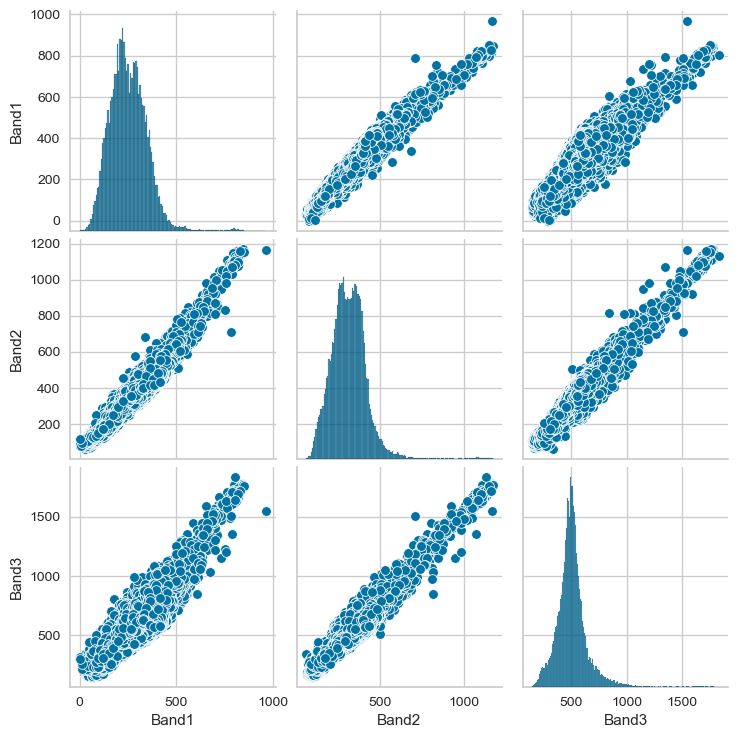

CPU times: total: 3.58 s
Wall time: 7.05 s


In [7]:
%%time

plt.figure(figsize = (6,6))
plt.tight_layout()

sns.pairplot(input_data[bands])
plt.show()

In [10]:
input_data[bands].corr()

Band1     Band2     Band3
Band1  1.000000  0.961680  0.838542
Band2  0.961680  1.000000  0.934139
Band3  0.838542  0.934139  1.000000

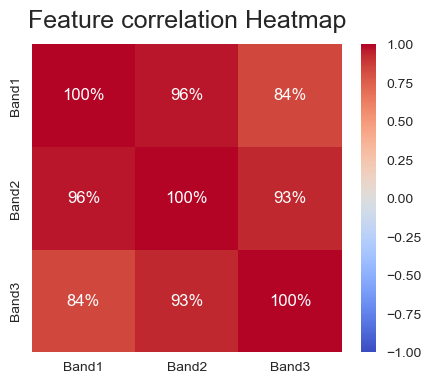

CPU times: total: 234 ms
Wall time: 445 ms


In [11]:
%%time
ax = plt.figure(figsize=(5, 4))


heatmap = sns.heatmap(input_data[bands].corr(), vmin=-1, vmax=1, annot=True, fmt ='.0%', cmap='coolwarm')




heatmap.set_title('Feature correlation Heatmap', fontdict={'fontsize':18}, pad=12);


plt.show()

#### Let's see what traditional band ratios tells us about distribution of minerals in the area
These band ratios are typical of how remote sensing data is analyzed manually. They work because photon interactions with materials are differential over some regions of the spectrum. By enhancing specific differences across the spectrum, it is possible to brine into relief, target minerals of interest.

#### Let's see if we can do some basic image segmentation using dimensionality reduction
First let's build the basic input data of features.

In [45]:

features = input_data[bands].copy()

for name in bands:
    features[name] = pd.to_numeric(features[name], errors='coerce')
    
features.fillna(0, inplace=True) 

features.head(10)

Band1  Band2  Band3
0    188    227    363
1    126    144    215
2    141    187    421
3    111    170    402
4    232    365    658
5    257    395    675
6    278    445    735
7    284    448    742
8    259    428    726
9    285    464    755

#### ML-specific data pre-processing


In [22]:
%%time

scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features[bands])

features_scaled = pd.DataFrame(features_scaled,columns=features[bands].columns, index=features.index)
features_scaled

CPU times: total: 0 ns
Wall time: 16 ms


Band1     Band2     Band3
0      0.194215  0.148783  0.127003
1      0.130165  0.073940  0.039169
2      0.145661  0.112714  0.161424
3      0.114669  0.097385  0.150148
4      0.239669  0.273219  0.302077
...         ...       ...       ...
48843  0.393595  0.348963  0.313353
48844  0.421488  0.379621  0.338872
48845  0.376033  0.317403  0.258160
48846  0.399793  0.318305  0.246884
48847  0.429752  0.336339  0.254599

[48848 rows x 3 columns]

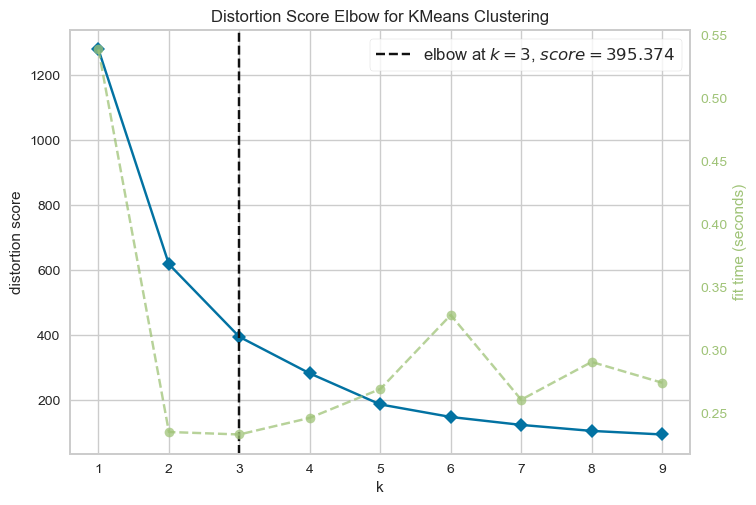

In [24]:
# Using the elbow method to find optimal k for the original dataset
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(features_scaled)
visualizer.show()

optimal_k = visualizer.elbow_value_

In [15]:
# Let's recall what our data looked like

X = features_scaled
X

Band1     Band2     Band3
0      0.194215  0.148783  0.127003
1      0.130165  0.073940  0.039169
2      0.145661  0.112714  0.161424
3      0.114669  0.097385  0.150148
4      0.239669  0.273219  0.302077
...         ...       ...       ...
48843  0.393595  0.348963  0.313353
48844  0.421488  0.379621  0.338872
48845  0.376033  0.317403  0.258160
48846  0.399793  0.318305  0.246884
48847  0.429752  0.336339  0.254599

[48848 rows x 3 columns]

In [41]:
# PCA with 3 bands

pca = PCA(n_components=3)
pca_data = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.94392645 0.05158633 0.00448722]


In [39]:
# k-means clustering on original data
kmeans_original = KMeans(n_clusters=optimal_k, random_state=42)
clusters_original = kmeans_original.fit_predict(X)

# k-means clustering on PCA reduced data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clustered_pca = kmeans.fit_predict(pca_data)

In [61]:
# visualizing the variance ratios using a scatter plot

# First we'll build the x-axis, which is just the number of components
x = [pc+1 for pc in range(len(pca.explained_variance_ratio_))]

# Then we'll build the y-axis, which is that vector of ratios
y = pca.explained_variance_ratio_

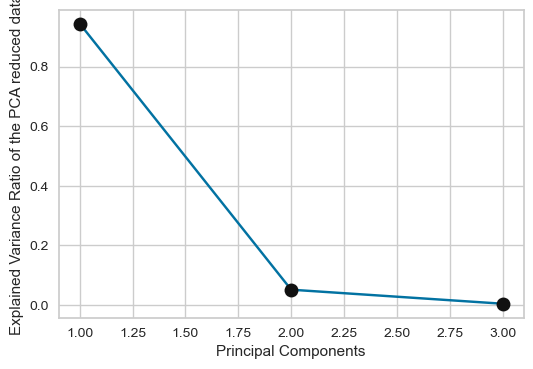

In [60]:
# Visualising the variance ratios of the PCA reduced data

plt.figure(figsize=(6,4))
plt.plot(x, y, markersize = 10, marker = 'o', markerfacecolor = 'k')


plt.grid(True)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio of the PCA reduced data")

plt.show()

So our hunch was right, the dataset is highly reducible using PCA. A single principal component contains almost all of the variability in the dataset.

PC 1 seems to be the most significant.

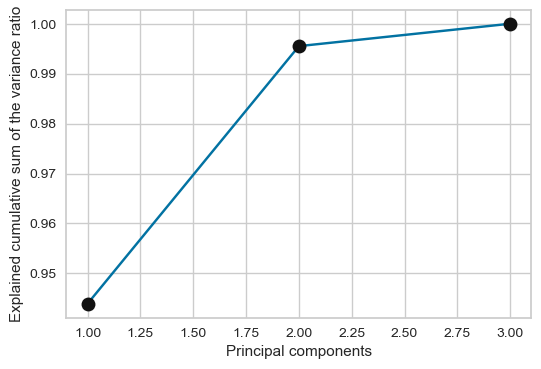

In [65]:
# visualizes of the cumulative sum of the variance ratios for the PCA reduced data

plt.figure(figsize = (6,4))
plt.plot(x, y.cumsum(), markersize = 10, marker = 'o', markerfacecolor = 'k')


plt.grid(True)
plt.xlabel("Principal components")
plt.ylabel("Explained cumulative sum of the variance ratio")

plt.show()

In [63]:
# We can access the PCA components using this - what are these?

x_pca.components_

array([[ 0.60145355,  0.60720173,  0.51919138],
       [-0.64352453, -0.01688969,  0.76523913],
       [ 0.4734235 , -0.79436818,  0.38059084]])

In [47]:
X.columns.values

array(['Band1', 'Band2', 'Band3'], dtype=object)

In [50]:
# Let's analyze the component loadings a bit

loadings = x_pca.components_
num_pc = x_pca.n_features_in_


pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))

loadings_df['Band'] = X.columns.values

loadings_df = loadings_df.set_index('Band')
loadings_df




PC1       PC2       PC3
Band                               
Band1  0.601454 -0.643525  0.473424
Band2  0.607202 -0.016890 -0.794368
Band3  0.519191  0.765239  0.380591

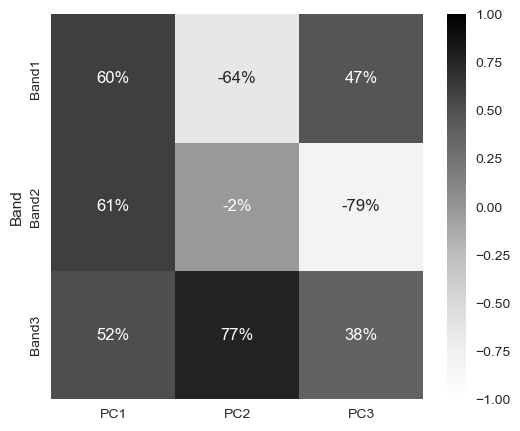

In [51]:
# One way to visualize this is through a heatmap 
# Although different datasets and analysis practices uses different visualizations, biplots are another popular one

plt.figure(figsize = (6, 5))
sns.heatmap(loadings_df, vmin=-1, vmax=1, annot=True, fmt='.0%',cmap='Greys', annot_kws={"size":12})

plt.show()

We actually didn't transform the data yet. We only called the ".fit()" from the PCA object. Now we'll actually transform our dataset using the trained PCA model using the ".transform()" method. If you don't want to analyze the components and so on, you can most of the time in sklearn do fit and transform in one shot, using ".fit_transform()".

In [52]:
x_trans = pca.transform(X)



x_trans = pd.DataFrame(x_trans, columns = pc_list) 




x_trans

PC1       PC2       PC3
0     -0.133766 -0.022828 -0.000139
1     -0.263335 -0.047560 -0.004438
2     -0.166998  0.035367  0.018627
3     -0.200800  0.046941  0.011840
4      0.060028  0.079793 -0.010836
...         ...       ...       ...
48843  0.204453 -0.011913  0.006159
48844  0.253095 -0.010852  0.004722
48845  0.146072 -0.042314  0.001909
48846  0.155056 -0.066248  0.008150
48847  0.188030 -0.079928  0.010943

[48848 rows x 3 columns]

We'll also add the coordinates back to the PCA-transformed data to create a dataframe that simplifies visualization.

In [53]:
pca_data = pd.concat([input_data[coord_names], x_trans], axis = 1)
pca_data

Longitude   Latitude       PC1       PC2       PC3
0      27.564250 -25.105965 -0.133766 -0.022828 -0.000139
1      27.564548 -25.105963 -0.263335 -0.047560 -0.004438
2      27.564845 -25.105962 -0.166998  0.035367  0.018627
3      27.565143 -25.105961 -0.200800  0.046941  0.011840
4      27.565440 -25.105960  0.060028  0.079793 -0.010836
...          ...        ...       ...       ...       ...
48843  27.647507 -25.151951  0.204453 -0.011913  0.006159
48844  27.647804 -25.151950  0.253095 -0.010852  0.004722
48845  27.648102 -25.151949  0.146072 -0.042314  0.001909
48846  27.648399 -25.151947  0.155056 -0.066248  0.008150
48847  27.648697 -25.151946  0.188030 -0.079928  0.010943

[48848 rows x 5 columns]

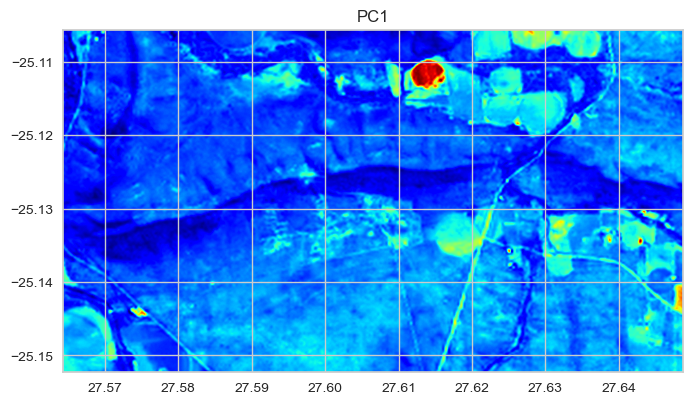

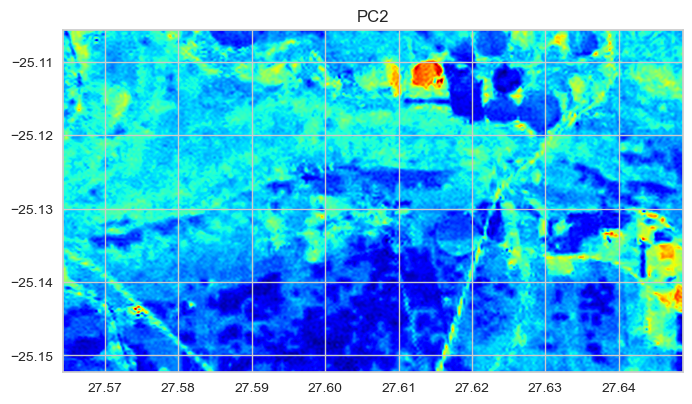

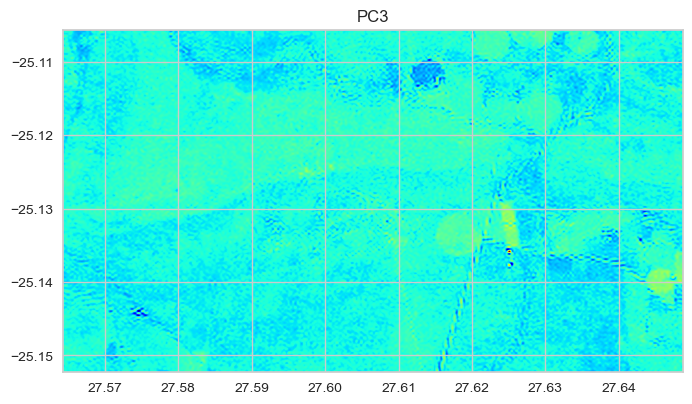

In [54]:
xmin = input_data['Longitude'].min()
xmax = input_data['Longitude'].max()
ymin = input_data['Latitude'].min()
ymax = input_data['Latitude'].max()

for pc in x_trans.columns:
    map_matrix = pca_data[pc].values.reshape(size)
    
    vmin = np.min(map_matrix)
    vmax = np.max(map_matrix)


    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)

    im =ax.imshow(map_matrix, cmap="jet",  vmin=vmin, vmax =vmax, 
                   extent = [xmin,xmax, ymin,ymax], aspect=1, interpolation = 'lanczos')
    plt.title(pc)
    plt.show()
    
    
    
    

Notice how in the visualizations, a single PCA basically captured all the anthropogenic footprint in the image? In fact, after about principal component 3, there isn't much in the images. The last two images look like mostly noise. I think we are safe to discard most of the data in lieu of just a few first principal components. Let's try that.

### Assignment

Perform clustering on the original data and compare it with the PCA-reduced data. Use 3 principal components. I recommend you try k-Means clustering. You can pick the number of clusters (k) using the elbow method. You can also use the Yellowbricks package if you wish, which facilitates this. 

Visualize the results of the clusters and compare between the results of the clusters of the original data and the PCA-reduced data at the same number of clusters. What do you see? Comment on your results.

In [57]:
data_for_clustering = input_data[coord_names + bands].dropna()

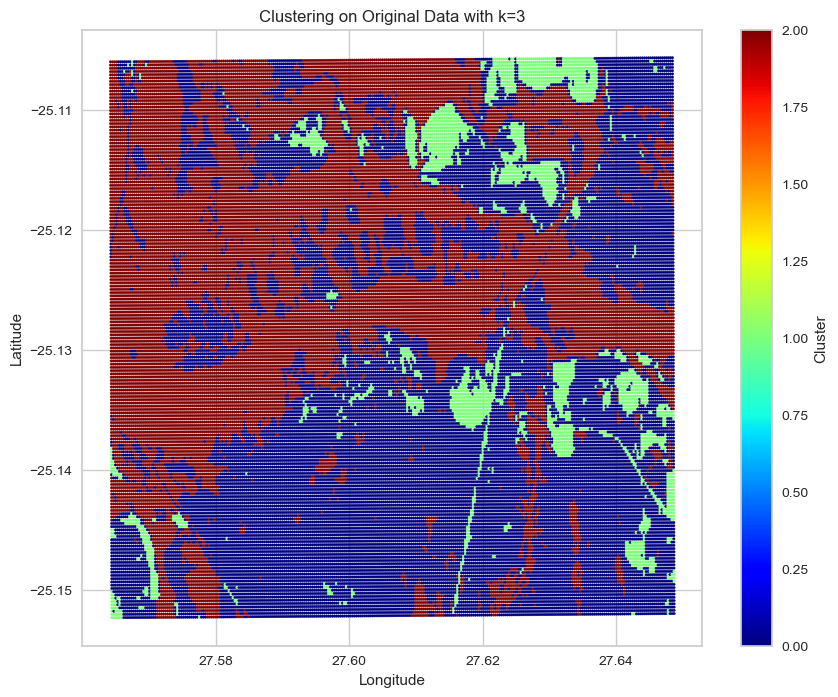

In [59]:
# Scatter plot for clusters on the original data
plt.figure(figsize=(10, 8))
plt.scatter(data_for_clustering['Longitude'], data_for_clustering['Latitude'], c=clusters_original, cmap='jet', s=3)
plt.title(f'Clustering on Original Data with k={optimal_k}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


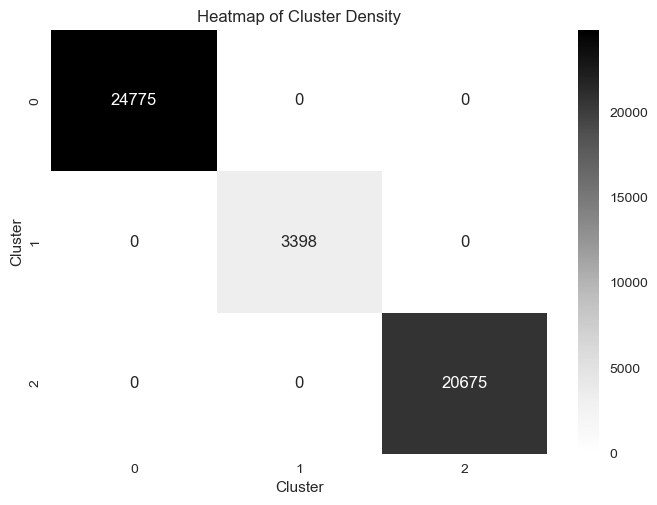

In [64]:
# Prepare data for heatmap
cluster_counts = pd.crosstab(clusters_original, clusters_original)
sns.heatmap(cluster_counts, cmap='Greys', annot=True, fmt='d', cbar=True)
plt.title("Heatmap of Cluster Density")
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()

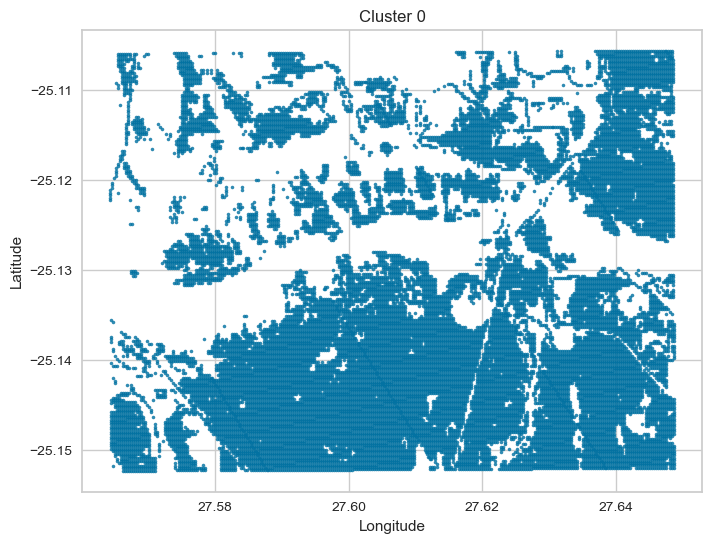

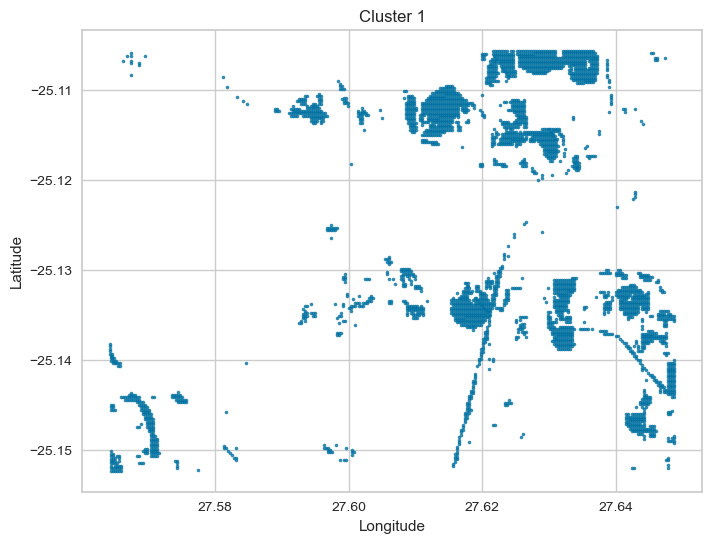

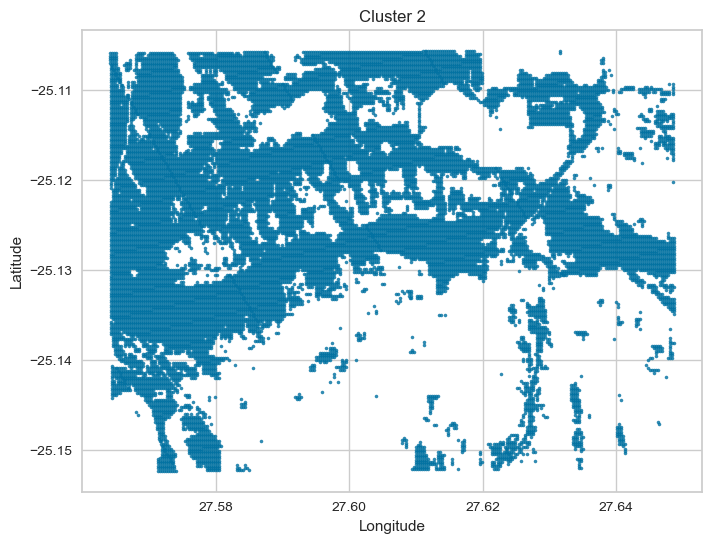

In [68]:
# Visualize each cluster on the map
for cluster_label in np.unique(clusters_original):
    plt.figure(figsize=(8, 6))
    cluster_data = input_data[clusters_original == cluster_label]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], s=5, alpha=0.8, cmap='jet')
    plt.title(f"Cluster {cluster_label}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()
